Consider the data present in the Insurance dataset file.<br>
Following is the attribute related information:<br><br>

age: age of primary beneficiary<br>
sex: insurance contractor gender, female, male<br>
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9<br>
children: Number of children covered by health insurance / Number of dependents<br>
smoker: Smoking, yes or no<br>
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.<br>
charges: Individual medical costs billed by health insurance<br><br>

Problem statement: To predict the approximate insurance cost based upon the rest of the features provided for each individual.

Import the libraries- Pandas, Numpy, Matplotlib and Seaborn

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Create a dataframe named "data" from the given datafile and print it's head

In [5]:
data = pd.read_csv(r'C:\Users\lenovo\Downloads\datasets_insurance.csv',header=0)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Understand the problem statement and the data, try understanding importance of each variable given.<br>
Perform Exploratory Data Analysis- print datatypes, dimension and descriptive statistics.

In [7]:
print(data.dtypes)
print(data.describe())
print(data.shape)
print(data.ndim)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object
               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010
(1338, 7)
2


Check if there are missing values. If yes, handle them.

In [9]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Check for Assumption 1- There should be no outliers in the data.<br>
Hint: Think logically, nothing needs to be worked upon here.

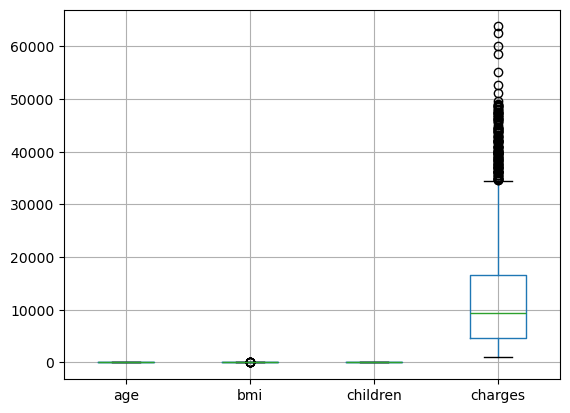

In [11]:
data.boxplot();

there is no outliers present in the dataset and if we talk about bmi as it's dtype is in float so the we cann't make boxplot 

Check for Assumption 2-Assumption of Linearity<br>
Hint: Use kind="scatter" in the pairplot, because it wont be able to fit a line in categorical variables. Some might show no relationship, but remember they are categorical or important variables, leave it as it is.

In [14]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

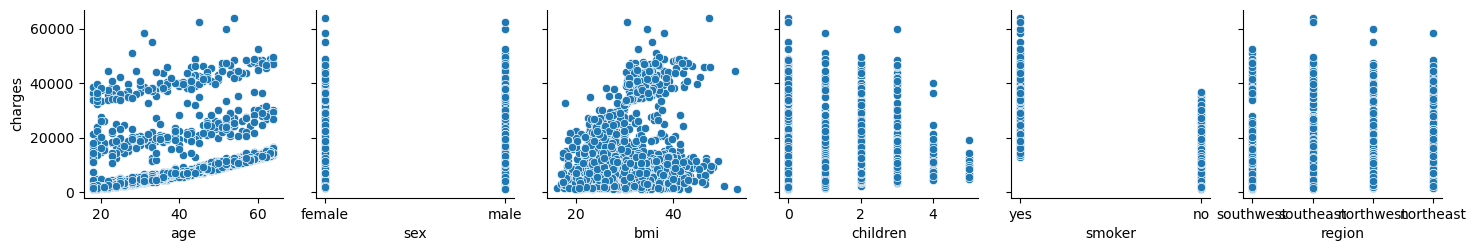

In [15]:
sns.pairplot(data,x_vars=['age','sex', 'bmi', 'children','smoker','region'],
                         y_vars=['charges'],kind='scatter')
plt.show()

Create X and Y

In [17]:
X= data.loc[:,['age','sex', 'bmi', 'children','smoker','region']]
Y= data.loc[:,'charges']

In [18]:
print(X.shape)
print(Y.shape)

(1338, 6)
(1338,)


Check for Assumption 3-Assumption of Normality <br>
Hint: You will find the data is highly positively skewed. So log transform the data.

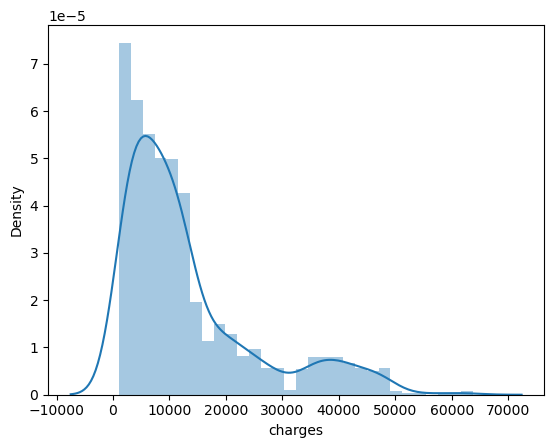

In [20]:
sns.distplot(Y)
plt.show()

In [21]:
import numpy as np
Y_log=np.log(Y)


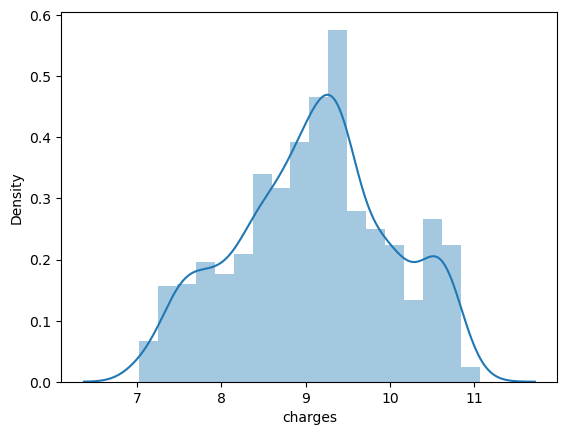

In [22]:
sns.distplot(Y_log)
plt.show()

Convert Categorical variables to numerical- Sex, Smoker and Region<br>
Hint: Make use of replace function. <br>
Sex: Female-0,Male-1<br>
Smoker: No-0, Yes-1<br>
Region: northeast-0,northwest-1,southeast-2,southwest-3<br><br>
Hint: X.Sex.replace({"Female":0,"Male":1}, inplace=True)

In [24]:
df=pd.DataFrame(data)
X.sex.replace({'female':0,'male':1}, inplace=True)
X.smoker.replace({'no':0,'yes':1},inplace=True)
X.region.replace({'northeast':0,'northwest':1,'southeast':2,'southwest':3},inplace=True)

In [25]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Check for the normality in the X variables. <br>
Hint: Some variables make not look normal but realize that they are actually discrete valued.
    No transformation required.

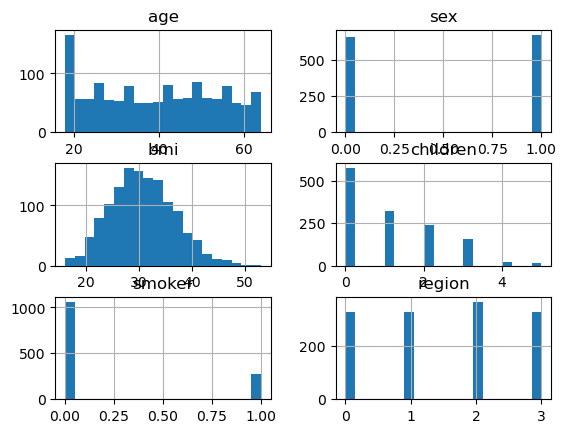

In [27]:
X.hist(bins=20)
plt.show()

Check for Assumption 4-No multicollinearity in the data<br>
Try both the approaches-correlation and VIF.<br>
Hint: You will find no high correlation. VIF might be high for a few variables but do not eliminate them because they are important as per the domain knowledge.

In [29]:
corr_df=X.corr(method='pearson')
print(corr_df)

               age       sex       bmi  children    smoker    region
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000


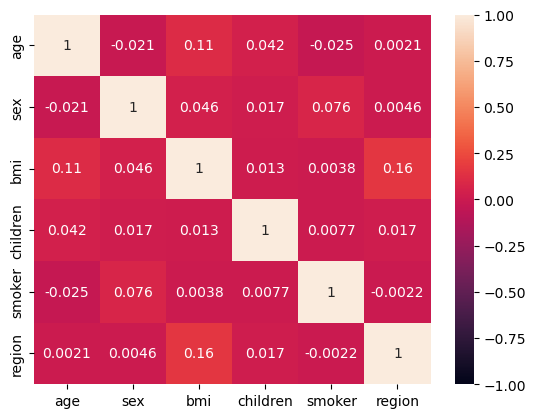

In [30]:
sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

In [31]:
 from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
 
vif_df = pd.DataFrame()
vif_df["features"] = X.columns
vif_df["VIF Factor"] = [vif(X.values, i) for i in range(X.shape[1])]
vif_df.round(2)


,features,VIF Factor
0,age,7.55
1,sex,2.00
2,bmi,10.37
3,children,1.80
4,smoker,1.26
5,region,2.92


Split the data into train and test.<br>
Hint: Make sure you are considering the log transformed Y.

In [33]:
from sklearn.model_selection import train_test_split

#split the data into the test and train 
X_train, X_test,Y_train,Y_test = train_test_split(X,Y_log, test_size=0.2,
                                                  random_state=10)

In [34]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1070, 6)
(268, 6)
(1070,)
(268,)


Build a base Linear Regression model using sklearn.

In [36]:
from sklearn.linear_model import LinearRegression
#create the model 
lm= LinearRegression()
#train the model object 
lm.fit(X_train,Y_train)

#print intercept and coefficients 
print(lm.intercept_)
print(lm.coef_)

6.998797622591985
[ 0.03498834 -0.0711322   0.01259126  0.09962977  1.5693443  -0.03889152]


Create a zipped list of the slope coefficients to understand the equation better.<br>
Write down the equation manually and try making sense out of it.

In [38]:
print(list(zip(X.columns,lm.coef_)))

[('age', 0.0349883414907649), ('sex', -0.07113220005343136), ('bmi', 0.012591262605124005), ('children', 0.09962976583044036), ('smoker', 1.5693443019666675), ('region', -0.03889151819958831)]


Predict using the model.

In [40]:
X1=50
X2=50
X3=50
X4=50
X5=50
X6=50
Y_pred=6.998797622591985+(0.03498834 * X1)+(-0.0711322*X2)+(0.01259126*X3)+(0.09962977*X4)+(1.5693443*X5)+(-0.03889152*X6)
print(Y_pred)

87.32529512259198


In [41]:
Y_pred=lm.predict(X_test)

In [42]:
new_df=pd.DataFrame()
new_df=X_test.copy()
 
new_df["Actual sales"]=Y_test
new_df["Predicted sales"]=Y_pred
new_df=new_df.reset_index().drop("index", axis=1)

In [43]:
new_df.head()

,age,sex,bmi,children,smoker,region,Actual sales,Predicted sales
0,37,0,27.740,3,0,1,8.893093,8.902646
1,36,0,26.885,0,0,1,8.569372,8.558002
2,59,1,37.100,1,0,3,9.421182,9.442069
3,61,0,25.080,0,0,2,10.106963,9.371092
4,29,0,26.030,0,0,1,8.225895,8.302319


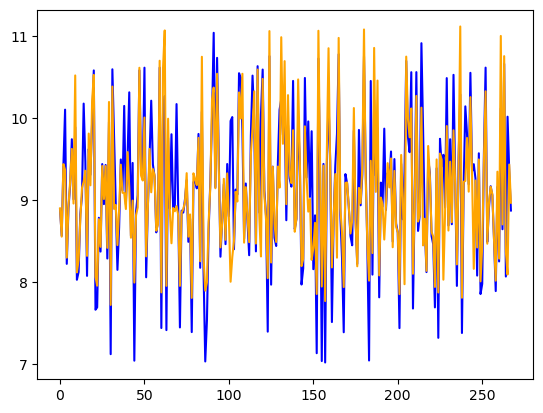

In [44]:
new_df["Actual sales"].plot(color="blue")
new_df["Predicted sales"].plot(color="orange")
plt.show()

Evaluate the model.

In [46]:
lm.score(X_train,Y_train)

0.7811636363349586

In [47]:
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7049534517624696
RMSE: 0.48823271856847067
Adj R-square: 0.703623414730595


In [48]:
print(Y_test.min())
print(Y_test.max())

7.02275569117477
11.044406702204412


In [49]:
new_df['Residual']=new_df['Actual sales']-new_df['Predicted sales']
new_df.to_excel('Salse prediction.xlsx', header=True, index=True)
new_df.head()

,age,sex,bmi,children,smoker,region,Actual sales,Predicted sales,Residual
0,37,0,27.740,3,0,1,8.893093,8.902646,-0.009553
1,36,0,26.885,0,0,1,8.569372,8.558002,0.011369
2,59,1,37.100,1,0,3,9.421182,9.442069,-0.020886
3,61,0,25.080,0,0,2,10.106963,9.371092,0.735870
4,29,0,26.030,0,0,1,8.225895,8.302319,-0.076423


Perform Ridge and Lasso regression. Evaluate them as well.<br>
Hint:Look at the fun in the Lasso Regression, ignore such model.

In [51]:
from sklearn.linear_model import Ridge 
rid= Ridge()

rid.fit(X_train,Y_train)

print(rid.intercept_)
print(rid.coef_)

7.000415207061314
[ 0.03498462 -0.07025584  0.01259184  0.09952118  1.5602262  -0.03886915]


In [52]:
Y_pred=lm.predict(X_test)


In [53]:
Y_pred=lm.predict(X_test)
Y_pred=rid.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7052731948166417
RMSE: 0.48796809703937555
Adj R-square: 0.7039445991509017


In [54]:
from sklearn.linear_model import Lasso
#create the model 
las= Lasso()
#train the model object 
las.fit(X_train,Y_train)

#print intercept and coefficients 
print(las.intercept_)
print(las.coef_)

7.895875452206857
[ 0.03043079  0.          0.          0.          0.         -0.        ]


In [55]:
Y_pred=las.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.21387850856962531
RMSE: 0.7969415049819164
Adj R-square: 0.21033476029871445


Create a sample dataframe named "new_df" to hold just the training data for the statsmodels model.

In [57]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [58]:
new_df=pd.DataFrame()
new_df=X_train.copy()
 
new_df["charges"]=Y_train.copy()
new_df.shape

(1070, 7)

Build OLS model using statsmodels library. Check the summary to evaluate.<br>
Hint: No high p-values. <br>

In [60]:
import statsmodels.formula.api as sm
 
# create a fitted model with all three features
lm_model = sm.ols(formula='charges ~ age+sex+bmi+children+smoker+region', 
                  data=new_df).fit()
 
# print the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept    6.998798
age          0.034988
sex         -0.071132
bmi          0.012591
children     0.099630
smoker       1.569344
region      -0.038892
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     632.4
Date:                Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:42:14   Log-Likelihood:                -620.60
No. Observations:                1070   AIC:                             1255.
Df Residuals:                    1063   BIC:                             1290.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err         

In [61]:
Y_pred=lm_model.predict(X_test)
from sklearn.metrics import r2_score,mean_squared_error
import numpy as np
 
r2=r2_score(Y_test,Y_pred)
print("R-squared:",r2)
 
rmse=np.sqrt(mean_squared_error(Y_test,Y_pred))
print("RMSE:",rmse)
 
adjusted_r_squared = 1 - (1-r2)*(len(Y)-1)/(len(Y)-X.shape[1]-1)
print("Adj R-square:",adjusted_r_squared)

R-squared: 0.7049534517624697
RMSE: 0.4882327185684706
Adj R-square: 0.7036234147305951


Predict using the model. Evaluate the model.

In [63]:
import statsmodels.formula.api as sm
 
# create a fitted model with all three features
lm_model = sm.ols(formula='charges ~ age+bmi+children+smoker', 
                  data=new_df).fit()
 
# print the coefficients
print(lm_model.params)
print(lm_model.summary())

Intercept    6.942717
age          0.035128
bmi          0.011224
children     0.099109
smoker       1.562676
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     931.2
Date:                Mon, 07 Apr 2025   Prob (F-statistic):               0.00
Time:                        12:42:14   Log-Likelihood:                -629.11
No. Observations:                1070   AIC:                             1268.
Df Residuals:                    1065   BIC:                             1293.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------

Write down your conclusion as to which is the final model that you would go with along with the reasons.

In [65]:
#the model is somewhat 78% GOOD and by Ridge  not lasso because it zeoes the many values 

Once finalized the model, try predicting the following observations for me.<br>
Create the dataframe named "X_test_sample" using the given dictionary object.<br>

sample_data={"age":[56,51,31,64,44,43,56],
             "sex":[1,0,1,1,0,1,1],
             "bmi":[19.95,18.05,34.39,25.6,23.98,32.6,33.725],
             "children":[0,0,3,2,2,2,0],"smoker":[1,0,1,0,0,0,0],"region":[0,1,1,3,2,3,1]}





In [67]:
X_test_sample={"age":[56,51,31,64,44,43,56],
             "sex":[1,0,1,1,0,1,1],
             "bmi":[19.95,18.05,34.39,25.6,23.98,32.6,33.725],
             "children":[0,0,3,2,2,2,0],"smoker":[1,0,1,0,0,0,0],"region":[0,1,1,3,2,3,1]}

In [68]:
df=pd.DataFrame(X_test_sample)
df

,age,sex,bmi,children,smoker,region
0,56,1,19.950,0,1,0
1,51,0,18.050,0,0,1
2,31,1,34.390,3,1,1
3,64,1,25.600,2,0,3
4,44,0,23.980,2,0,2
5,43,1,32.600,2,0,3
6,56,1,33.725,0,0,1


In [69]:
Y_pred_new=rid.predict(df)

The predicted values would be log transformed.Convert them back to original values.<br>
Hint: Use np.exp()

In [77]:
Y_log_sample=np.exp(Y_pred_new)
Y_log_sample

array([44388.31731204,  7887.57862613, 28785.77219046, 14385.28600088,
        7808.70890381,  7535.85009894, 10668.90567122])

Save the predicted values along with the observations into an excel file.

In [120]:
new_df.to_excel('Insurance data outcome.xlsx')

In [ ]:
import os 
ps.getcwd